# 기초데이터과학 (01분반)

## 12-1. 통계적 가설 검정 (Statistical hypothesis test)

### Acknowledgement
#### 이 자료는 다음 서적의 내용을 바탕으로 작성되었음
- 쉽게 배우는 파이썬 데이터 분석. 이지스 퍼블리싱
- 혼자 공부하는 데이터 분석 with 파이썬. 한빛미디어
- 누구나 파이썬 통계분석. 한빛아카데미

### 통계 분석 구분
- 기술 통계 (descriptive statistics) 분석
- 추론 통계 (inferential statistics) 분석

#### 기술 통계
- 데이터를 요약해 설명하는 통계적 기법
- 모집단으로부터 수집된 데이터를 요약하여 모집단에 대한 유용한 정보를 제공
- 데이터를 그래프, 표, 통계량(평균, 중간값 같은 대표값을 나타내는 숫자)으로 요약
- 예: 사람들이 받는 월급을 집계해 전체 월급 평균을 구한다면 이는 기술 통계 분석에 해당
  
#### 추론 통계
- 단순히 숫자를 요약하는 것을 넘어 어떤 값이 발생할 확률을 계산하는 통계 분석 기법
- 관심의 대상이 되는 전체 집단(모집단)에 대한 조사가 불가능하거나 비효율적일 때 모집단의 일부(표본)만을 관측하여 모집단의 특성을 추측하는 분석
- 예: 사람들의 월급 데이터에서 남여 성별에 따라 평균 월급 수치에 차이가 있는 것으로 나타났을 때 이러한 차이가 우연히 발생할 확률을 계산하고, 이 확률이 작다면 성별에 따른 평균 월급 차이가 통계적으로 유의하다(statistically significant)고 결론을 내리고 반대로 이런 차이가 우연히 발생할 확률이 크다면 성별에 따른 월급 차이가 통계적으로 유의하지 않다(not statistically significant)고 결론 내림
- 일반적으로 통계 분석을 수행한다는 것은 추론 통계를 이용해 가설 검정을 한다는 의미
  - 기술 통계 분석에서 집단 간 차이가 있는 것으로 나타났더라도 이는 우연에 의한 차이일 수 있음
  - 데이터를 이용해 신뢰할 수 있는 결론을 내리려면 유의확률을 계산하는 통계적 가설 검정 절차를 거쳐야 함

#### 예제

In [100]:
import pandas as pd
import seaborn as sns

peng = sns.load_dataset('penguins')
print(peng)

# species: 펭귄의 종을 나타내는 문자열
# island : 샘플들이 수집된 Palmer Station 근처 섬 이름
# bill length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
# bill depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
# flipper length (mm) : 펭귄의 날개 길이
# body mass (g) : 펭귄의 몸무게
# sex : 펭귄의 성별

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

- 펭귄의 종별(Adelie, Chinstrap, Gentoo) 평균 몸무게는 얼마인가?

In [101]:
mean_mass = peng.groupby('species').agg(mean_body_mass = ('body_mass_g', 'mean'))
print(mean_mass)

           mean_body_mass
species                  
Adelie        3700.662252
Chinstrap     3733.088235
Gentoo        5076.016260


- 종별 평균 몸무게는 차이가 나는가?
  - Adelie 펭귄의 평균 몸무게는 3700.7g 정도이고 Chinstrap 펭귄의 평균 몸무게는 3733.1g 정도로 평균 값 수치 상 33g 차이가 나는데 이 차이가 유의미한 차이인가?
  - Gentoo 펭귄의 평균 몸무게는 5076g 정도인데 이는 Adelie 펭귄이나 Chinstrap 펭귄의 평균 몸무게와 유의미한 차이를 보이는 것인가?

### 통계적 가설 검정 (statistical hypothesis test)
- 유의확률을 이용해 가설을 검정하는 방법

#### 가설
- 귀무가설(영가설. null hypothesis): 일반적으로 받아들여지는 가설 (보통 표본 사이에 통계적으로 차이가 없다고 예상되는 가설)
  - 예: Adelie 펭귄과 Gentoo 펭귄의 평균 몸무게는 동일하다. Adelie 펭귄과 Chinstrap 펭귄의 평균 몸무게는 동일하다.
- 대립가설(alternative hypothesis): 귀무가설과 대립되는 입증해야 하는 가설 (보통 표본 사이에 통계적으로 차이가 있다는 가설)
  - 예: Adelie 펭귄의 평균 몸무게는 Gentoo 펭귄의 평균 몸무게와 같지 않다.

- Adelie 펭귄의 평균 몸무게를 $\mu_A$, Gentoo 펭귄의 평균 몸무게를 $\mu_G$라고 할 때,
  - 귀무가설 $H_0: \mu_A - \mu_G = 0 $
  - 대립가설 $H_1: \mu_A - \mu_G \neq 0 $

#### 유의확률 (significance probability. p-value)
- 실제로는 집단 간 차이가 없는데 우연히 차이가 있는 데이터가 추출될 확률
- 유의확률이 크게 나타났다면 '집단 간 차이가 통계적으로 유의하지 않다'고 해석함
  - 이는 실제로 차이가 없더라도 우연에 의해 이런 정도의 차이가 관찰될 가능성이 있다는 것을 의미함
  - 대립가설이 기각되고 귀무가설이 채택됨 
- 반대로 유의확률이 작다면 '집단 간 차이가 통계적으로 유의하다'고 해석함
  - 이는 실제로 차이가 없는데 우연히 이런 정도의 차이가 관찰될 가능성이 작다, 즉 우연이라고 보기 힘들다는 의미
  - 귀무가설이 기각되고 대립가설이 채택됨

##### 유의수준 (level of significance)
- 귀무가설의 기각 여부를 판단하는 기준값
- 유의확률(p-value)이 유의수준보다 작을 때 귀무가설을 기각하고, 그렇지 않을 때 귀무가설을 채택함
- 보통 5% 혹은 1% 유의수준을 많이 사용 

#### 가설 검정
- 표본관찰을 통하여 대립되는 두 가설 귀무가설($H_0$)과 대립가설($H_1$) 중에서 하나를 선택하는 것임
- 그러므로 $H_0$를 채택(accept)하면 $H_1$를 기각(reject)하게 되고, $H_0$를 기각하면 $H_1$를 채택하게 됨


### 2표본 문제에 관한 가설 검정
#### 두 모집단에 관한 가설 검정
- 두 개의 집단/그룹의 데이터가 있을 때 두 집단의 대표값(평균, 중간값) 사이에 차이가 있는지 검정
  - 예: Adelie 펭귄의 몸무게와 Chinstrap 펭귄의 몸무게는 차이가 나는가?
- 종류
  - 모집단이 정규분포를 따른다고 가정할 수 있는가, 두 집단의 데이터가 대응이 되는가 여부로 네 가지로 분류

- 데이터에 대응이 있다는 것, 즉 대응표본
  - 두 데이터에서 서로 대응하는 동일한 개체에 대해 각각 다른 조건으로 측정한 것
  - 예 1: 동일한 집단의 피검자를 대상으로 혈압약을 투여하기 전후에 측정한 혈압은 동일한 피검자에 대해서 투약 전후라는 두 조건으로 측정한 것이므로 대응표본
  - 예 2: A 학급의 학생 20명을 대상으로 근력운동을 하면 집중력이 향상되는 효과가 있는지 확인하기 위해서 1주일간 근력운동을 하게 하고 운동 전후에 집중력을 측정하는 테스트를 받게 함. 동일한 학생 20명 각각에 대해서 운동 전후라는 두 조건으로 측정한 것이므로 대응표본


- 데이터에 대응이 없다는 것은 두 데이터에서 개체가 다른 데이터로 되어 있는 독립표본을 말함
  - 예: A 학급의 시험 점수와 B 학급의 시험 점수는 서로 다른 학생의 시험 점수를 비교하는 데 쓰이므로 독립표본의 데이터

#### 정규분포를 가정할 수 있음
- 대응 표본: 대응비교 t 검정 (paired t-test)
  - 대응하는 데이터가 있고 데이터 차이에 정규분포를 가정할 수 있는 경우의 평균값 차이에 대한 검정
- 독립 표본: 독립비교 t 검정 (independent t-test)
  - 대응하는 데이터가 없고 독립된 2표본 모집단에 정규분포를 가정할 수 있는 경우 평균값의 차이에 대한 검정

#### 정규분포를 가정할 수 없음
- 대응 표본: 윌콕슨의 부호순위검정 (Wilcoxon signed-rank test)
  - 대응표본에서 차이에 정규분포를 가정할 수 없는 경우, 중간값의 차이에 대한 검정
- 독립 표본: 만-위트니의 U 검정 (Mann-whitney rank test)
  - 대응되는 데이터가 없는 2표본 모집단에 정규분포를 가정할 수 없는 경우, 중간값의 차이에 대한 검정

#### 펭귄 종별 몸무게의 예
- Adelie 펭귄의 평균 몸무게는 3700.7g 정도이고 Gentoo 펭귄의 평균 몸무게는 5076g 정도인데 이는 유의미한 차이를 보이는 것인지를 확인해보려면 어떤 검정을 해야 하는가?
  - 펭귄 종별 몸무게 데이터는 정규분포를 따른다고 가정한다고 할 때 (정규성을 검정하는 방법도 있으나 여기서는 생략)


In [102]:
import pandas as pd
import seaborn as sns

peng = sns.load_dataset('penguins')

# 결측치 제거
peng = peng.dropna()

print(peng)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

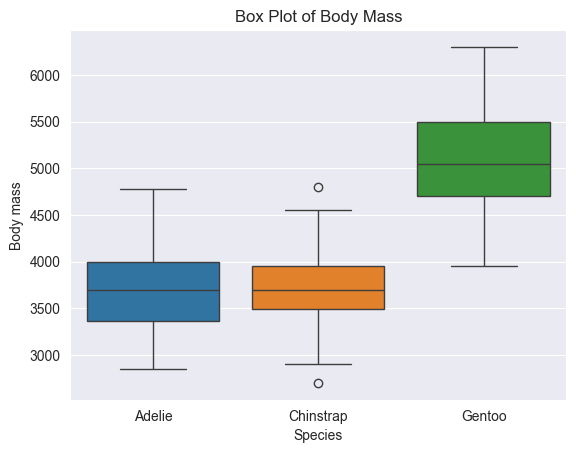

In [103]:
import matplotlib.pyplot as plt

sns.boxplot(data=peng, x='species', y='body_mass_g', hue='species')

plt.title('Box Plot of Body Mass')
plt.xlabel('Species')
plt.ylabel('Body mass')

plt.show()

In [104]:
mean_mass = peng.groupby('species').agg(mean_body_mass = ('body_mass_g', 'mean'))
print(mean_mass)

           mean_body_mass
species                  
Adelie        3706.164384
Chinstrap     3733.088235
Gentoo        5092.436975


#### 펭귄 몸무게 차이에 대한 가설 검정
- 독립비교 t 검정 (independent t-test)
  - scipy 패키지의 ttest_ind() 함수 이용
  - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [105]:
# 펭귄 종별 몸무게 데이터 추출

# Adelie 펭귄의 몸무게 데이터
adelie = peng.query('species == "Adelie"')['body_mass_g']
print(adelie.shape)

# Gentoo 펭귄의 몸무게 데이터
gentoo = peng.query('species == "Gentoo"')['body_mass_g']
print(gentoo.shape)

# Chinstrap 펭귄의 몸무게 데이터
chinstrap = peng.query('species == "Chinstrap"')['body_mass_g']
print(chinstrap.shape)

(146,)
(119,)
(68,)


##### Adelie 펭귄과 Gentoo 펭귄의 몸무게 차이 검정

In [106]:
# independent t-test

from scipy import stats

# Adelie 펭귄과 Gentoo 펭귄의 몸무게 데이터를 이용하여 독립비교 t 검정 수행
print(stats.ttest_ind(adelie, gentoo, equal_var = True))
# equal_var: 비교하는 두 집단의 분산이 같은지 여부를 설정. True이면 분산이 같다
# 등분산성을 검정하는 방법이 있으나 여기서는 다루지 않음

TtestResult(statistic=np.float64(-23.466803147391744), pvalue=np.float64(1.8806652580952688e-66), df=np.float64(263.0))


In [107]:
print(stats.ttest_ind(adelie, gentoo, equal_var = False))
# 두 집단의 분산이 다른 경우 equal_var를 False로 설정

TtestResult(statistic=np.float64(-23.25392442915641), pvalue=np.float64(1.223170419256714e-63), df=np.float64(242.14429956468885))


- 위 출력 결과에서 pvalue 항목이 유의확률을 의미함
- 두 경우 모두 0에 아주 가까운 값으로 유의수준 5%라고 할 때 유의확률은 0.05보다 매우 작으므로 두 집단 간의 차이를 우연이라고 보기 어렵다고 결론 내릴 수 있음
- 즉, Adelie 펭귄의 몸무게와 Gentoo 펭귄의 몸무게는 동일하다는 귀무가설을 기각하고 '두 종의 펭귄 몸무게의 차이는 통계적으로 유의하다'고 할 수 있음

##### Adelie 펭귄과 Chinstrap 펭귄의 몸무게 차이 검정

In [108]:
print(stats.ttest_ind(adelie, chinstrap, equal_var = True))

TtestResult(statistic=np.float64(-0.42011219955863177), pvalue=np.float64(0.6748289682757558), df=np.float64(212.0))


- 유의확률 p-value가 0.675 정도로 유의수준 0.05보다 크므로 귀무가설을 채택
  - 실제로는 차이가 없는데 우연에 의해 이런 정도의 차이(3706g vs. 3733g)가 관찰될 확률이 67.5%라는 의미
- 'Adelie 펭귄과 Chinstrap 펭귄의 몸무게의 차이는 통계적으로 유의하지 않다'고 결론내릴 수 있음
  - Chinstrap 펭귄의 몸무게 평균이 27g 정도 높지만 이런 정도의 차이는 우연히 발생했을 가능성이 크다고 해석

In [109]:
print(stats.ttest_ind(adelie, chinstrap, equal_var = False))

TtestResult(statistic=np.float64(-0.44792967534690686), pvalue=np.float64(0.6548333152810653), df=np.float64(154.03261935924448))


- 분산이 다르다고 가정하여도 유의확률 p-value가 0.655 정도로 유의수준 0.05보다 크므로 귀무가설 채택

#### t 검정 예제
- compact 자동차와 suv 자동차의 도시 연비 t 검정
  - mpg 데이터에서 compact 자동차와 suv 자동차의 도시 연비 차이가 통계적으로 유의한지 알아보자

In [110]:
mpg = pd.read_csv('mpg.csv')

print(mpg)

    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

    category  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       

In [111]:
# 수치형 데이터의 기술 통계량 출력
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


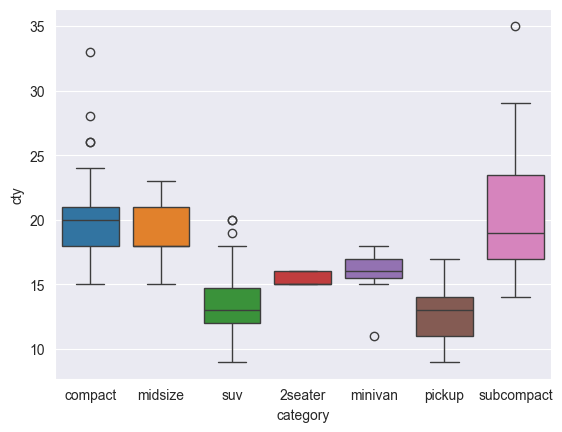

In [112]:
# 자동차 종류 별 도시 연비 상자 그림 그래프 
sns.boxplot(data=mpg, x='category', y='cty', hue='category')
plt.show()

In [113]:
# compact 자동차와 suv 자동차의 도시 연비 평균 계산

mpg.query('category in ["compact", "suv"]').groupby('category', as_index = False).agg(n = ('category', 'count'), mean = ('cty', 'mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [114]:
# compact 자동차의 도시 연비 데이터 추출
compact = mpg.query('category == "compact"')['cty']

# suv 자동차의 도시 연비 데이터 추출
suv = mpg.query('category == "suv"')['cty']

In [115]:
# 독립비교 t 검정 수행
print(stats.ttest_ind(compact, suv, equal_var = True)) # 분산이 같다고 가정

TtestResult(statistic=np.float64(11.917282584324107), pvalue=np.float64(2.3909550904711282e-21), df=np.float64(107.0))


In [116]:
# 독립비교 t 검정 수행
print(stats.ttest_ind(compact, suv, equal_var = False)) # 분산이 다르다고 가정

TtestResult(statistic=np.float64(11.393337383053918), pvalue=np.float64(2.1615589248472624e-18), df=np.float64(79.55836897088487))


- 유의수준 5%라고 할 때 유의확률이 0에 가까운 0.05보다 매우 작은 값이므로 compact 자동차와 suv 자동차 간 평균 도시 연비 차이가 통계적으로 유의하다고 할 수 있음 

#### 연습문제 1
- 일반 휘발유와 고급 휘발유의 도시 연비 t 검정
  - mpg 데이터에서 일반 휘발유(regular)를 사용하는 자동차와 고급 휘발유(premium)를 사용하는 자동차의 도시 연비 차이가 통계적으로 유의한지 알아보자

In [117]:
mpg = pd.read_csv('mpg.csv')

print(mpg)

    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

    category  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       

- 일반 휘발유, 고급 휘발유의 구분은 fl 컬럼의 값으로 되어 있음
  - fl 변수의 값이 'r'이면 일반, 'p'이면 고급

In [118]:
# fl이 'r'이거나 'p'인 데이터를 추출하고 fl 별로 그룹을 나눈 후 각 그룹의 개수와 cty의 평균을 계산하여 출력
copy_mpg=mpg.copy()

fuel=copy_mpg.query('fl in ["r","p"]').groupby('fl',as_index=False).agg(n=('fl','count'),mean=('cty','mean'))

print(fuel)


  fl    n       mean
0  p   52  17.365385
1  r  168  16.738095


In [119]:
# fl이 'r'인 자동차의 도시 연비 데이터 추출
data_r=copy_mpg.query('fl=="r"')['cty']

# fl이 'p'인 자동차의 도시 연비 데이터 추출
data_p=copy_mpg.query('fl=="p"')['cty']

# 독립비교 t 검정 수행
inde_rp_1=stats.ttest_ind(data_p,data_r,equal_var=True)
inde_rp_2=stats.ttest_ind(data_p,data_r,equal_var=False)

print(inde_rp_1)
print("\n",inde_rp_2)

TtestResult(statistic=np.float64(1.066182514588919), pvalue=np.float64(0.28752051088667036), df=np.float64(218.0))

 TtestResult(statistic=np.float64(1.2117591348322236), pvalue=np.float64(0.22826815682047347), df=np.float64(107.22593360381175))


#### 연습문제 2
- 실린더 개수(cyl)가 4인 경우와 6인 경우 고속도로 연비 t 검정
  - mpg 데이터에서 실린더 개수가 4개인 자동차와 6개인 자동차의 고속도로 연비 차이가 통계적으로 유의한지 알아보자

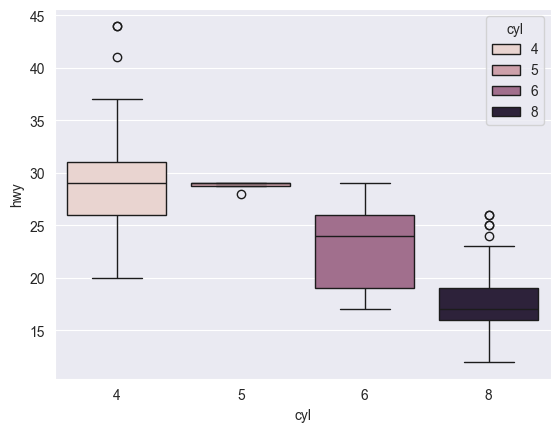

In [120]:
sns.boxplot(data=mpg, x='cyl', y='hwy', hue='cyl')
plt.show()

- 실린더 개수가 4개인 자동차와 6개인 자동차의 고속도로 연비 평균을 계산하여 출력하고 독립비교 t 검정을 수행하시오.

In [121]:
cyl=copy_mpg.query('cyl in [4,6]').groupby('cyl',as_index=False).agg(mean=('hwy','mean'))

print(cyl)

hwy_cyl4=copy_mpg.query('cyl==4')['hwy']
hwy_cyl6=copy_mpg.query('cyl==6')['hwy']

inde_cyl_1=stats.ttest_ind(hwy_cyl6,hwy_cyl4,equal_var=True)
inde_cyl_2=stats.ttest_ind(hwy_cyl6,hwy_cyl4,equal_var=False)

print("\n",inde_cyl_1)
print("\n",inde_cyl_2)

   cyl       mean
0    4  28.802469
1    6  22.822785

 TtestResult(statistic=np.float64(-9.164268140320146), pvalue=np.float64(2.5208361103406716e-16), df=np.float64(158.0))

 TtestResult(statistic=np.float64(-9.187380091291248), pvalue=np.float64(2.6721576729999665e-16), df=np.float64(153.2755521549814))


#### 연습문제 3
- tips 데이터에서 Lunch와 Dinner의 total bill t 검정
  - tips 데이터에서 식사 시간이 Lunch인 금액과 Dinner인 금액의 차이가 통계적으로 유의한지 알아보자

In [122]:
tips = sns.load_dataset("tips")

copy_tips=tips.copy()
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


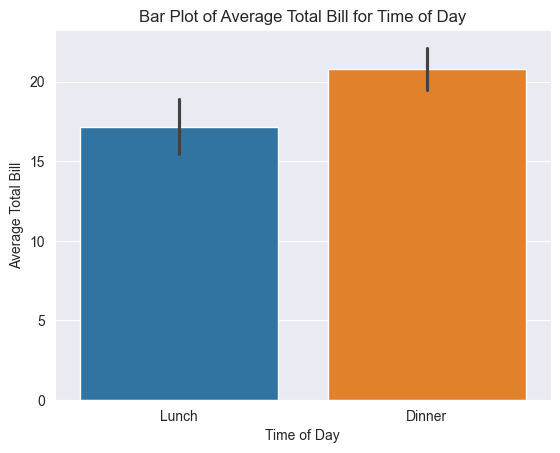

In [123]:
import numpy as np

sns.barplot(data=tips, x="time", y="total_bill", estimator=np.mean, hue='time')

plt.title('Bar Plot of Average Total Bill for Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Total Bill')

plt.show()

- Lunch와 Dinner의 Total bill 평균을 계산하여 출력하고 독립비교 t 검정을 수행하시오.

In [124]:
bills_mean=copy_tips.query('time in ["Dinner", "Lunch"]').groupby('total_bill',as_index=False).agg(mean=('total_bill','mean'))

print(bills_mean)

lunch=copy_tips.query('time=="Dinner"')['total_bill']
dinner=copy_tips.query('time=="Lunch"')['total_bill']

inde_totalbill=stats.ttest_ind(lunch,dinner,equal_var=True)

print("\n",inde_totalbill)

     total_bill   mean
0          3.07   3.07
1          5.75   5.75
2          7.25   7.25
3          7.51   7.51
4          7.56   7.56
..          ...    ...
224       45.35  45.35
225       48.17  48.17
226       48.27  48.27
227       48.33  48.33
228       50.81  50.81

[229 rows x 2 columns]

 TtestResult(statistic=np.float64(2.8976375218366424), pvalue=np.float64(0.004104621407595674), df=np.float64(242.0))
